# SIR Model

Let's start by considering how disease spread should be modelled. Excellent references include Murray (2002, Ch. 10, included on Classes in Resources/Handouts) and [Hethcote (2000)](https://www.maths.usyd.edu.au/u/marym/populations/hethcote.pdf).  

To start with, we consider a closed population of size $N$, and define three classes of individuals:

- $S(t) = $ number of susceptible individuals (susceptible to contracting the disease)
- $I(t) = $ number of infectious individuals (able to transmit the disease)
- $R(t) = $ number of removed individuals (not susceptible or infectious)

The removed class includes individuals who have recovered from the disease (assuming recovery brings immunity), or died, as well as those who've been vaccinated.  

How does transmission occur?  A virus like Covid19 spreads through the air, so transmission occurs mainly from close proximity to infected individuals, especially in unventilated spaces.  One of the the most challenging aspects of controlling Covid19 has been the fact that it spreds asymptomatically. In fact, *peak infectiousness occurs about two days before the onset of symptoms*.  Thus especially before this was understood, there was often no apparent reason to limit contact.

In a typical day, humans have a typical number of contacts with other humans.  Epidemiologists talk about "adequate contacts", which mean contacts with others in sufficient proximity, and for long enough time, to make transmission of the disease likely.  Passing a security guard every day and saying hi is contact, but not likely adequate for transmission.  Sitting in a shared office with two others, however, likely is.  We thus define:

$$a = [\text{average number of adequate contacts per person, per unit time}]$$

If all people in the population are equally likely to contact any other person$^\dagger$, then 

$$a\,\frac{I}{N} = [\text{average number of contacts with infectious individuals, per person, per unit time}]$$

Thus

$$ a\,\frac{I}{N}S = [\text{average number of new infections in the population, per unit time}]$$

So in a time $\delta t$, we lose this many individuals from the susceptible group, i.e. 

$$S(t+\delta t)-S(t) = -a\,\frac{I}{N}S\, \delta t$$

This number now enters the infected pool, but to understand how the number of infectives changes in time, we must also consider the rate at which the are removed, through recovery or death (or vaccination, discussed later).  For Covid19, individuals are typically contagious for about $T_c = 12$ days.  You may not be fully recovered, but for the purposes of modeling disease spread, this is the number we care about. 

To be technical, we would model removal as an exponential Poisson process with an e-folding decay time of $T_c$.  In this case, 

$$\frac{\delta t}{T_c}I = [\text{mean number of infetives removed in time} \delta t]$$

For convenience in the model, we define

$$b = T_c^{-1} = [\text{the inverse average removal time}]$$

Thus in time $\delta t$, the change in the infective pool is

$$I(t+\delta t)-I(t) = a\,\frac{I}{N}S\, \delta t - b I \delta t$$
and those removed enter the removed pool at the same rate, i.e.
$$R(t+\delta t)-R(t) = b I \delta t$$

The forms above make it obvious how to convert to differential equations: assume $S$, $I$ and $R$ are continuous real variables, divide each equation by $\delta t$, and take the limit $\delta t \rightarrow 0$.  (But it is important to keep in mind how bad these assumptions may be in many cases!  Later, we will see how to use this form to model disease spread stochastically.). The result is the classic deterministic SIR model 
\begin{align}
\dot{S} &= -aS\frac{I}{N}\\
\dot{I} &= aS\frac{I}{N} - bI\\
\dot{R} &= bI
\end{align}
with initial conditions $S(0) = S_0$, $I(0) = I_0$ and $R(0) = R_0$.  

Notes: 
- By design, the total population (including the dead) is constant, because 
$$\dot{S}+\dot{I}+\dot{R} = \frac{d}{dt} (S+I+R) = 0 \quad \Rightarrow \quad S+I+R = \text{constant} = N$$

- The model does not depend on $R$, which can always be recovered from $S$ and $I$ using $R = N-S-I$.  Thus it is actually a 2-dimensional dynamical system. 

**Question:** how you would modify this model to include separate compartments for dead and recovered populations?  How about vaccinated people?

**Question:** News and government agencies often show graphs of "daily new cases" (the number of new positive cases per day).  Using variables from the model, what is this quantity?



## Nondimensional numbers and criterion for an outbreak


### Basic reproduction number $\sigma$

Consider first a reasonable initial condition with one infective, and the entire population susceptible, i.e. $I_0=1$, $S_0 = N-1 \approx N$.  The growth of the infective population at the start is then

$$\dot{I}(0) = a\frac{I_0}{N}S_0 -  b\,I_0 = b\left(\sigma - 1\right)$$

where

$$\sigma \equiv \frac{aS_0}{bN}$$

is called the "basic reproduction number" (typically this is represented with the symbol $R_0$, but here I wish to avoid confusion with the initial condition for $R$). If $\sigma >1$, then at early times, $I$ grows exponentially: this is the condition for an epidemic.  

It's easier to understand what $\sigma$ represents if we consider the equation for $I$ with finite $\delta t$.  Then

$$I(\delta t)-1 = \frac{aS_0}{N}\, \delta t - b\,\delta t 
= b\,\delta t\left(\sigma - 1\right)$$

where

$$\sigma = \frac{a\,\delta t\, S_0/N }{b\,\delta t} 
= \frac{\text{number of new infectives}}{\text{number of removed infectives}}$$

So the basic reproduction number $\alpha$ is the average number of additional infectives in the population per infective. Studies estimate that **for Covid19, $\sigma \approx 2.2$**.  

### Replacement number $r_t$

The replacement number is the time-dependent version of $\sigma$: it is the average number of additional infectives per infective at any time during the epidemic, i.e.

$$r_t = \frac{aS(t)}{bN}$$

Note that $r_t(0) = \sigma$, but because $S(t)$ is always decreasing, $r_t(t>0) < \sigma$. When we reach the point where $r_t<1$, the rate of change of the infective population is negative, and things are getting better.


**Question** with time-series for $I$ and $R$, how might you estimate $r_t$ at some time without knowing $a$, $b$ or $N$?  



## Herd immunity

From the above, herd immunity happens when $r_t<1$, or 

$$\frac{S}{N} < \frac{b}{a} = \frac{1}{\sigma}$$

if $S_0 \approx N$.  

What is the total fraction of the population that is immune at this point?  For this purpose, immunity includes the entire removed population, including those vaccinated, plus those who are currently sick (you can't catch it if you already have it), i.e.

$$\text{Immune fraction of population} = \frac{R + I}{N} = 1 - \frac{S}{N}$$

Setting $S/N$ to the critical value $1/\sigma$ at which $r_t=1$, it must be the case that we need 

$$\text{Immune fraction of population} > \frac{R + I}{N} = 1 - \frac{1}{\sigma}$$

So 

$$\text{Herd immunity population fraction} = 1 - \frac{1}{\sigma}$$

For Covid19, with $\sigma \approx 2.2$, the fraction is $\approx .55$ (which is quite a bit lower than what Dr Fauci told us, but looking at the current numbers in the US, seems to be about right)

## Fixed points and stability


For the stability analysis, it's useful to partially nondimensionalze the equations by dividing by $N$. Ignoring $R$ for now, and defining the population fractions with lower-case letters as $s(t) = S(t)/N$ and $\imath(t) = I(t)/N$, the equations are
\begin{align}
\dot{s} &= -a\,s\imath\\
\dot{\imath} &= (a\,s - b)\,\imath
\end{align}

The obvious fixed points of this system are $\imath = 0$, with any value of $s$.  The obvious interesting choice is to consider an initally healthy population with $s(0) = 1$, i.e. we consider the fixed point $(1,0)$.  The Jacobian at this point is
$$J = \begin{bmatrix} -a\imath & -a s \\ a\imath & as-b \end{bmatrix}_{(1,0)} 
= \begin{bmatrix} 0 & -a  \\ 0 & a-b \end{bmatrix}$$

The eigenvalues are 

$$\lambda = \frac{a-b}{2}\pm\sqrt{\left(\frac{a-b}{2}\right)^2-0} ~ = ~ a-b \quad\text{or}\quad 0$$

Since here $S_0=N$, the fraction $a/b = \sigma$, and we have the expected result that if $\sigma>1$, the fixed point at the origin is unstable.  

To compute the phase plane trajectories, note that

$$\frac{\dot{\imath}}{\dot{s}} = \frac{d\imath}{ds} = -1 + \frac{1}{s\sigma}$$

**Question:** What does the phase plane look like?

**Question:** What is the peak fraction of infectives, $\imath_\text{max}$? When does this occur?


## Numerical model

Below we use a numerical ODE integrator to solve the SIR system.

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [7]:
# The SIR model differential equations.
def SIRdot(Y, t, N, a, b):
    S, I, R = Y
    dSdt = -a * S * I/N 
    dIdt = a * S * I/N  - b * I
    dRdt = b * I
    
    return dSdt, dIdt, dRdt


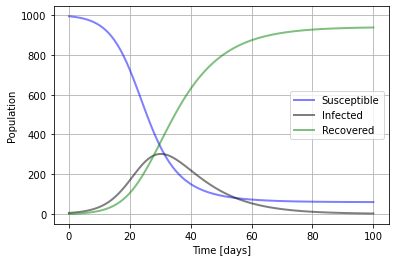

In [8]:
# Total population, N.
N = 1000
I0 = 5
R0 = 0
S0 = N - I0 - R0

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
a = 0.3
b = 0.1

# A grid of time points (in days)
T = 100
dt = 1
Nt = np.int(T/dt)+1
t = np.linspace(0, T, Nt)

# Initial conditions vector
Y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t.
sol = odeint(SIRdot, Y0, t, args=(N, a, b))
S, I, R = sol.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
plt.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, I, 'k', alpha=0.5, lw=2, label='Infected')
plt.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered')
plt.xlabel('Time [days]')
plt.ylabel('Population')
#plt.ylim(0,1.2)
plt.grid() 
plt.legend()


Reproduction number: $Ro = \frac{aS(0)}{bN}$

In [9]:
a*Y0[0]/(b*N) #reproduction number

2.985

## Stochastic SIR 

A stochastic version of the model, in which the variables are integers (as they should be) can be constructed using the *Gillespie algorithm* (see Wikipedia page).  

The probability in time interval $t$ to $t+\delta t$ of infection is 

$$p_\text{infection} = a (I/N) \,\delta t$$ 

and the probability for removal in the same interval is 

$$p_\text{removal} = b \,\delta t$$  

Noting that both probabilities are less than 1, we decide whether an event occurs by selecting a random number $r\in [0,1)$ and comparing this to each event probability.  Specifically, for susceptible person, if $p_\text{infection}<r$, we say that person has become infected, and so the number of suceptibles $S$ decreases by 1, and the number of infectives $I$ increases by 1:

$$r<p_\text{infection} \quad\Rightarrow\quad S\rightarrow S-1, \quad I\rightarrow I+1.$$

We do a similar test for each infective person.  

In [10]:
def SIRstep(N,S,I,R,a,b,dt):
    for i in range(S):
        if np.random.random_sample() < a*I*dt/N:
            S, I = S-1, I+1
    for i in range(I):
        if np.random.random_sample() < b*dt:
            I, R = I-1, R+1
            
    return S, I, R

In [11]:
# Solve stochastic SIR with same parameters and initial condition
Ss, Is, Rs = S0, I0, R0
X = [[Ss, Is, Rs]]     # X is a list

for i in range(Nt-1):
    Ss, Is, Rs = SIRstep(N,Ss,Is,Rs,a,b,dt)
    X = X + [[Ss,Is,Rs]]   # Append to list
    
X = np.asarray(X)   # Convert to numpy array
Ss = X[:,0]
Is = X[:,1]
Rs = X[:,2]


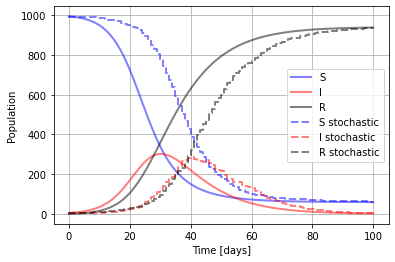

In [12]:
# Plot deterministic and stochastic results in same figure

fig = plt.figure(facecolor='w')
plt.plot(t, S, 'b', alpha=0.5, lw=2, label='S')
plt.plot(t, I, 'r', alpha=0.5, lw=2, label='I')
plt.plot(t, R, 'k', alpha=0.5, lw=2, label='R')

plt.step(t, Ss, 'b--',  alpha=0.5, lw=2, label='S stochastic')
plt.step(t, Is, 'r--',  alpha=0.5, lw=2, label='I stochastic')
plt.step(t, Rs, 'k--',  alpha=0.5, lw=2, label='R stochastic')

plt.xlabel('Time [days]')
plt.ylabel('Population')
plt.grid()
plt.legend()

# Parameter estimation using the Gauss-Newton method

Let's see if we can extract the deterministic parameters from the stochastic model output for $I(t_i) = I_i$, using Gauss-Newton.  

Starting with initial parameter guess $[a_0,b_0]$, compute an initial model solution $\tilde{I}(t,a_0,b_0)$ using the deterministic solver. Also compute four more solutions: 

$$\tilde{I}(t,a_0+\delta a,b_0), \quad 
  \tilde{I}(t,a_0-\delta a,b_0), \quad
  \tilde{I}(t,a_0,b_0+\delta b), \quad
  \tilde{I}(t,a_0,b_0-\delta b)$$
 
with $\delta a = a_0/10$ and $\delta b = b_0/10$ as a first try.
  
Use these solutions to compute the parameter gradients 

\begin{align}
\frac{\partial \tilde{I}}{\partial a} &= \frac{\tilde{I}(t,a_0+\delta a,b_0)-\tilde{I}(t,a_0-\delta a,b_0)}{2\delta a}\\
\frac{\partial \tilde{I}}{\partial b} &= \frac{\tilde{I}(t,a_0,b_0+\delta b)-\tilde{I}(t,a_0,b_0-\delta b)}{2\delta b}
\end{align}

For Gauss-Newton, we find solve a least squares problem to minimize a cost function between the data and current model guess, and iterate until the parameters have (hopefully) converged.  Define the first parameter guess $\theta_j^{(0)}$, where $\theta_1^{(0)} = a_0$, $\theta_2^{(0)} = b_0$.   Iterate $k$ is then $\theta_j^{(k)}$.  The Jacobian for iterate $k$ is $J_{ij}^{(k)} = \partial\tilde{I}_i/\partial\theta_j^{(k)}$, where $\tilde{I}_i^{(k)} = \tilde{I}(t_i,\theta_1^{(k)},\theta_2^{(k)})$.  

Defining the column vectors $\mathbf{\Delta I} = I_i - \tilde{I}_i^{(k)}$ and $\mathbf{\Delta\theta} = \theta_j^{(k+1)}-\theta_j^{(k)}$, and the matrix $\mathsf{J} = J_{ij}^{(k)}$ (suppressing the index $k$ because the notation is getting crowded), we solve the \textit{Normal System}

$$\mathbf{\Delta\theta} = (\mathsf{J}^T\mathsf{J})^{-1}(\mathsf{J}^T \mathbf{\Delta I})$$

starting with $k=0$ and iterating until some tolerance is satisfied.  I will use $||\Delta\theta|| < 0.01$ as the condition.

In [9]:
def SIRsol_with_param_gradients(SIRdot, t, S0, I0, R0, a, b):
    # Compute solution 7 times:  [a, b, N], [a+da,b, N], [a-da,b, N], [a, b+db, N], [a, b-db, N],
    # [a, b, N+dN], [a, b, N-dN]
    # Then compute gradient wrt a, b, at each t
    Y0 = S0, I0, R0
    #N = S0+I0+R0
    da = a/10
    db = b/10
    dN = N/10
    
    sol = odeint(SIRdot, Y0, t, args=(N, a, b))
    S, I, R = sol.T

    sol = odeint(SIRdot, Y0, t, args=(N, a+da, b))
    Sap, Iap, Rap = sol.T
 
    sol = odeint(SIRdot, Y0, t, args=(N, a-da, b))
    Sam, Iam, Ram = sol.T

    sol = odeint(SIRdot, Y0, t, args=(N, a, b+db))
    Sbp, Ibp, Rbp = sol.T
 
    sol = odeint(SIRdot, Y0, t, args=(N, a, b-db))
    Sbm, Ibm, Rbm = sol.T

    sol = odeint(SIRdot, Y0, t, args=(N+dN, a, b))
    SNp, INp, RNp = sol.T
 
    sol = odeint(SIRdot, Y0, t, args=(N-dN, a, b))
    SNm, INm, RNm = sol.T

    dIda = (Iap-Iam)/(2*da)
    dIdb = (Ibp-Ibm)/(2*db)
    dIdN = (INp-INm)/(2*dN)
    
    #return S, I, R, dIda, dIdb
    return I, dIda, dIdb, dIdN, S

In [18]:
def GaussIter(t, Idata, I0, a0, b0, N0):
    tol = .01
    NiterMax = 50
    
    a, b, N = a0, b0, N0
    Da, Db, DN = 1, 1, 1
    
    fig = plt.figure(facecolor='w')
    plt.plot(t, Idata, 'b.', label='Data')
    
    Niter = 0
    while np.sqrt((Da)**2+(Db)**2+(DN)**2) > tol and Niter < NiterMax:
        Niter += 1
        It, dIda, dIdb, dIdN, St = SIRsol_with_param_gradients(SIRdot, t, N-I0, I0, 0, a, b)
        DI = Idata-It
        J = np.vstack((dIda,dIdb,dIdN)).T
        Da,Db,DN = np.linalg.inv(J.T.dot(J)).dot(J.T.dot(DI))
        a = a+Da
        b = b+Db
        N = N+DN
        
        plt.plot(t, It, alpha=0.5, lw=2, label='Model fit')
        
    plt.xlabel('Time /days')
    plt.ylabel('Infected population')
    plt.grid()
    plt.legend()
    return It, a, b, N, Niter, dIda, dIdb, St

/opt/conda/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/opt/conda/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/opt/conda/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


LinAlgError: Singular matrix

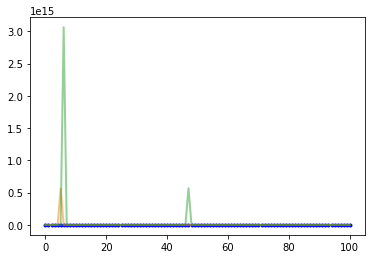

In [20]:
# Guess initial a, b (actual values are 0.3, 0.1)
#N = 1000 # Maybe later this will be absorbed in a
a0 = .2
b0 = .05
N0 = 900

#It, dIda, dIdb = SIRsol_with_param_gradients(SIRdot, t, S0, I0, R0, a0, b0)
It, at, bt, Nt, Niter, dIda, dIdb, St = GaussIter(t, Is, I0, a0, b0, N0)
at, bt, Niter

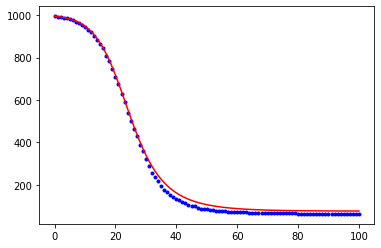

In [15]:
fig = plt.figure(facecolor='w')
plt.plot(t, Ss, 'b.', label='Data')
plt.plot(t, St, 'r', label='Data')


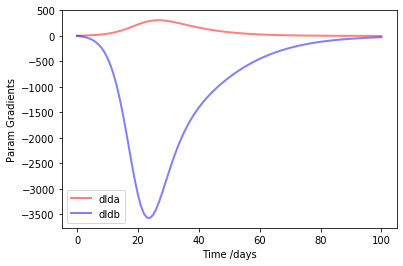

In [12]:
fig = plt.figure(facecolor='w')
plt.plot(t, It, 'r', alpha=0.5, lw=2, label='dIda')
plt.plot(t, dIdb, 'b', alpha=0.5, lw=2, label='dIdb')
plt.xlabel('Time /days')
plt.ylabel('Param Gradients')
plt.legend()

Try fitting real data, and use scipy optimize instead of my Gauss-Newton code

In [2]:
from scipy.optimize import curve_fit
import csv

In [16]:
# Open csv files in 'r'ead-only form, one at a time. 
# Extract reader object (see documentation link above),
# and successively append each row to lists:

confirmed = [] 
death = []
recovered = []

with open("time_series_covid19_confirmed_global.csv", 'r') as csvfile: 
    csvreader = csv.reader(csvfile) 
    for row in csvreader: 
        #row
        confirmed.append(row)
with open("time_series_covid19_deaths_global.csv",'r') as csvfile:
    csvreader = csv.reader(csvfile) 
    for row in csvreader: 
        death.append(row)
with open("time_series_covid19_recovered_global.csv",'r') as csvfile:
    csvreader = csv.reader(csvfile) 
    for row in csvreader: 
        recovered.append(row)
        
# confirmed, death, recovered are now lists of lists.  
# confirmed[0]  returns the first row - the header row - as a list.  
# confirmed[0][1] returns the first element of the first row.  Instead 
# we would like to have arrays that we can slice:
confirmed = np.asarray(confirmed)
death = np.asarray(death)
recovered = np.asarray(recovered)

num_days = np.shape(confirmed[:,4:])[1]

In [41]:
print(confirmed[:,1])

['Country/Region' 'Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Australia'
 'Australia' 'Australia' 'Australia' 'Australia' 'Australia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burma' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada'
 'Canada' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)'

First day with confirmed cases 0


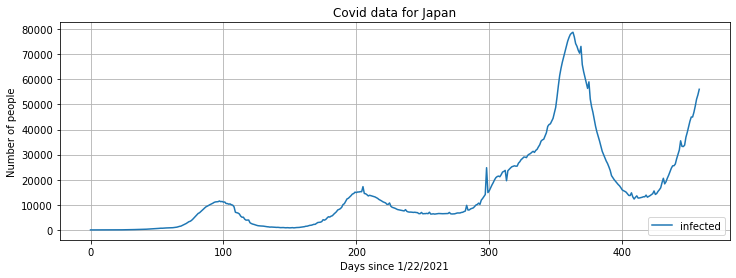

In [46]:
idx = np.where(confirmed[:,1] == 'Japan') 
idx = idx[0]                         # take only first value, convert to integer
confirmed_myregion = confirmed[idx, 4:]   # grab one row of data as an array
confirmed_myregion = confirmed_myregion[0].astype(np.float)  # convert to floating point

idx = np.where(death[:,1] == 'Japan')
idx = idx[0]
death_myregion = death[idx, 4:]
death_myregion = death_myregion[0].astype(np.float)

idx = np.where(recovered[:,1] == 'Japan')
idx = idx[0]
recovered_myregion = recovered[idx, 4:]
recovered_myregion = recovered_myregion[0].astype(np.float)

idx_start = np.where(confirmed_myregion > 0)[0][0]
print('First day with confirmed cases',idx_start)

# Remove the data before the first case in the time series, so it will have a nonzero initial condition:
confirmed_myregion = confirmed_myregion[idx_start:]
death_myregion = death_myregion[idx_start:]
recovered_myregion = recovered_myregion[idx_start:]

# Make an array of time values, as days since 1/22/2020
t = np.arange(idx_start,num_days)

R = death_myregion + recovered_myregion
I = confirmed_myregion - death_myregion - recovered_myregion


# Plot I and R vs. t
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(t, I,label = 'infected')
#ax.plot(t, R, 'b', label = 'removed')
ax.grid(True)
ax.set(title='Covid data for Japan')
ax.set(xlabel='Days since 1/22/2021')
ax.set(ylabel='Number of people')
ax.legend(loc="lower right")

In [47]:
# From your data
I0 = I[0]  
R0 = R[0]

# Make a function that returns only I(t) from SIR, and takes only the arguments you want to fit
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
def SIR(t,N,a,b):
    Y0 = N-I0-R0, I0, R0

    # Integrate the equations over the time grid, t.
    ret = odeint(SIRdot, Y0, t, args=(N,a,b))
    S,I,R = ret.T
    return I     #np.concatenate( (I, R),axis=0)


a =  0.3065355643529244  b =  0.19999999999999868  N =  155968.6001243402


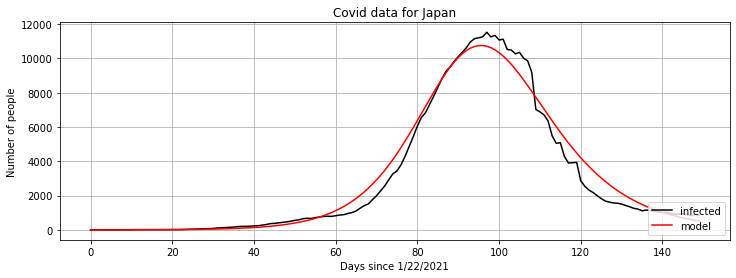

In [56]:

# Initial guesses for unknown parameters
N0 = 10000000  # Japan population ~ 126 million
a0 = .2
b0 = 1/12

params, pcov = curve_fit(SIR, t[0:150], I[0:150], p0 = [N0, a0, b0], bounds = ([N0/100, 0.0, .05], [3*N0, 5.0, .2]) )
N,a,b = params
print('a = ',a,' b = ', b, ' N = ', N)

Imodel = SIR(t[0:150],N,a,b)

fig, ax = plt.subplots(figsize=(12,4))

ax.plot(t[0:150], I[0:150], 'k', label = 'infected')
ax.grid(True)
ax.plot(t[0:150], Imodel[0:150], 'r', label = 'model')

ax.set(title='Covid data for Japan')
ax.set(xlabel='Days since 1/22/2021')
ax.set(ylabel='Number of people')
ax.legend(loc="lower right")